In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Downloads/HR_capstone_dataset - HR_capstone_dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df = df.rename(columns={'left':'left_job', 'Department':'Department_worked','salary':'Salary_given', 'time_spend_company':'time_spend', 'average_montly_hours':'avgmonthly_hours', 'promotion_last_5years':'last5yrs_promotion'})
df.head(10)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'avgmonthly_hours', 'time_spend', 'Work_accident', 'left_job',
       'last5yrs_promotion', 'Department_worked', 'Salary_given'],
      dtype='object')

In [6]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows
duplicate_rows_sorted = duplicate_rows.sort_values(by = ['satisfaction_level', 'last_evaluation', 'number_project','avgmonthly_hours', 'time_spend', 'Work_accident', 'left_job', 'last5yrs_promotion', 'Department_worked','Salary_given'])
print(duplicate_rows_sorted.head())
df.drop_duplicates(inplace=True)

       satisfaction_level  last_evaluation  number_project  avgmonthly_hours  \
30                   0.09             0.62               6               294   
12030                0.09             0.62               6               294   
14241                0.09             0.62               6               294   
71                   0.09             0.77               5               275   
12071                0.09             0.77               5               275   

       time_spend  Work_accident  left_job  last5yrs_promotion  \
30              4              0         1                   0   
12030           4              0         1                   0   
14241           4              0         1                   0   
71              4              0         1                   0   
12071           4              0         1                   0   

      Department_worked Salary_given  
30           accounting          low  
12030        accounting          low  
14241

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   satisfaction_level  11991 non-null  float64
 1   last_evaluation     11991 non-null  float64
 2   number_project      11991 non-null  int64  
 3   avgmonthly_hours    11991 non-null  int64  
 4   time_spend          11991 non-null  int64  
 5   Work_accident       11991 non-null  int64  
 6   left_job            11991 non-null  int64  
 7   last5yrs_promotion  11991 non-null  int64  
 8   Department_worked   11991 non-null  object 
 9   Salary_given        11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


<Axes: >

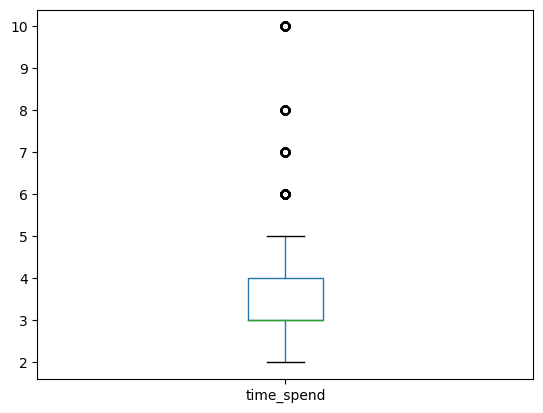

In [8]:
df.boxplot(column='time_spend', grid=False)

In [9]:
outlierss = df[df['time_spend'] >6].shape[0]
outlierss

282

In [10]:
#There are 282 rows containing outliers. but lets not drop them cause they are legit values. 

In [11]:
left_people = df[df['left_job']==1].shape[0]
print('left_people =',left_people)
stayed_people = df[df['left_job']==0].shape[0]
print('stayed_people =',stayed_people)
percentage_left = ((left_people)/df['left_job'].shape[0])*100
print(f'{percentage_left:.2f}% people left the job')
percentage_stayed = ((stayed_people)/df['left_job'].shape[0])*100
print(f'{percentage_stayed:.2f}% people stayed at the job')


left_people = 1991
stayed_people = 10000
16.60% people left the job
83.40% people stayed at the job


In [12]:
plt.figure(figsize = (8,5))
sns.scatterplot(x ='number_project',y='satisfaction_level',data = df, color = 'maroon')


<Axes: xlabel='number_project', ylabel='satisfaction_level'>

In [13]:
#It is seen that employees are most unsatisfied if they are given 7 projects.

In [14]:
plt.figure(figsize = (8,5))
sns.scatterplot(x ='avgmonthly_hours',y='satisfaction_level',data = df, color = 'maroon')

<Axes: xlabel='avgmonthly_hours', ylabel='satisfaction_level'>

In [15]:
#It can be seen that people are mostly satisfied when they get work for about 125 to 275 hours mostly. It can also be seen that employees are 
#least satisfied when they have to work around 250-300 hours a month. The above values are loosely corrleated. it can be because of other factors like salary, 
#number of projects, etc. 

In [16]:
df.boxplot(column='avgmonthly_hours', grid=False)

<Axes: xlabel='avgmonthly_hours', ylabel='satisfaction_level'>

In [17]:
#there are no outliers in average monthly hours. 

In [18]:
#Let"s plot salary and other values

In [19]:
category_mapping = {'low': 1,'medium': 2,'high': 3}
df['New_salary'] = df['Salary_given'].map(category_mapping)
df

,satisfaction_level,last_evaluation,number_project,avgmonthly_hours,time_spend,Work_accident,left_job,last5yrs_promotion,Department_worked,Salary_given,New_salary
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high,3
11996,0.74,0.95,5,266,10,0,0,1,management,high,3
11997,0.85,0.54,3,185,10,0,0,1,management,high,3
11998,0.33,0.65,3,172,10,0,0,1,marketing,high,3


In [20]:
plt.figure(figsize = (8,5))
sns.scatterplot(x='New_salary', y = 'avgmonthly_hours', data = df, color = 'violet')

<Axes: xlabel='New_salary', ylabel='avgmonthly_hours'>

In [21]:
#it can be seen there is low to negligible corrleation between salary and monthly hours

In [22]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'New_salary', y = 'satisfaction_level', data = df, color = 'orange')

<Axes: xlabel='New_salary', ylabel='satisfaction_level'>

In [23]:
#it can be seen there is low to negligible corrleation between salary and satiscaftion level

In [24]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'satisfaction_level', y = 'last5yrs_promotion', data = df, color = 'purple')

<Axes: xlabel='satisfaction_level', ylabel='last5yrs_promotion'>

In [25]:
#it can be seen that less no of employees are unsatisfied when they are promoted. they are loosely corrleated. 

In [26]:

plt.figure(figsize = (8,5))
sns.scatterplot(x = 'satisfaction_level', y = 'last_evaluation', data = df)


<Axes: xlabel='satisfaction_level', ylabel='last_evaluation'>

In [27]:
#It is seen that employees with higher evaluation score tend to be more staisfied, which indicates a higher corrleation

In [28]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'New_salary', y = 'last_evaluation', data = df, color = 'skyblue')

<Axes: xlabel='New_salary', ylabel='last_evaluation'>

In [29]:
#there is less corrleation betn salary and last evaluation

In [30]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'last5yrs_promotion', y = 'last_evaluation', data = df, color = 'green')

<Axes: xlabel='last5yrs_promotion', ylabel='last_evaluation'>

In [31]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'avgmonthly_hours', y = 'number_project', color = 'red', data = df)

<Axes: xlabel='avgmonthly_hours', ylabel='number_project'>

In [32]:
#as we can see, the upper limit of average monthly hours is more in higher number of project and lower limit of average monthly hours is significantly less in higher nyumber of projects. 

In [33]:
departments = df['Department_worked'].unique()
print(departments)

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [34]:
mapping_departments = {'sales':1, 'accounting':2, 'hr':3, 'technical':4, 'support':5,'management':6, 'IT':7, 'product_mng':8, 'marketing':9, 'RAndD':10}
df['Departments'] = df['Department_worked'].map(mapping_departments)
df

,satisfaction_level,last_evaluation,number_project,avgmonthly_hours,time_spend,Work_accident,left_job,last5yrs_promotion,Department_worked,Salary_given,New_salary,Departments
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,1.0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2,1.0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2,1.0
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,1.0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high,3,6.0
11996,0.74,0.95,5,266,10,0,0,1,management,high,3,6.0
11997,0.85,0.54,3,185,10,0,0,1,management,high,3,6.0
11998,0.33,0.65,3,172,10,0,0,1,marketing,high,3,9.0


In [35]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'Departments', y = 'satisfaction_level', color = 'cornflowerblue', data = df)

<Axes: xlabel='Departments', ylabel='satisfaction_level'>

In [36]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'Departments', y = 'avgmonthly_hours', color = 'chocolate', data = df)

<Axes: xlabel='Departments', ylabel='avgmonthly_hours'>

In [79]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'Departments', y = 'left_job', color = 'darkgreen', data = df)

<Axes: xlabel='Departments', ylabel='left_job'>

In [38]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'Departments', y = 'Work_accident', color = 'blueviolet', data = df)

<Axes: xlabel='Departments', ylabel='Work_accident'>

In [39]:
#there seems to be less corrleation betn jobs and other factors. But, some of the corrleations cant be viewed directly without table. 
#it is because of the fact that some values like work accident have only 2 values, 0 and 1. and the graph is same no matter how many values are there in 0 or 1. 
#it will be red even if we have 1 0r 1000s of values. 